In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql
import plotly.express as px

In [ ]:
# add

In [2]:
import datetime
from dateutil.relativedelta import relativedelta

In [3]:
from datetime import date

In [4]:
df=pd.read_excel(r"./datasets/HospitalDatabase.xlsx",sheet_name=None)
edvisits=df['EDVisits']
ambulatoryvisits=df['AmbulatoryVisits']
providers=df['Providers']
patients=df['Patients']
edunique=df['EDUnique']
readmissionregistry=df['ReAdmissionRegistry']
discharges=df['Discharges']

# Q1 Calculate the time spent in ED Department for each visit

In [5]:
edunique['DifferenceIn_Hour']=edunique['EDDischargeTime']-edunique['VisitDate']
edunique['DifferenceIn_Hour']=edunique['DifferenceIn_Hour']/np.timedelta64(1,'h')
EDUnique1=round(edunique.pivot_table(index='ReasonForVisit',columns='EDDisposition',values='DifferenceIn_Hour'))
EDUnique1


EDDisposition,Admitted,Discharged,admitted,discharged
ReasonForVisit,,,,
Accident,NaN,NaN,9.0,NaN
Bleeding,15.0,13.0,NaN,NaN
Car Accident,12.0,NaN,7.0,NaN
Chest Pain,11.0,NaN,12.0,13.0
Fever,NaN,13.0,10.0,13.0
Gun Shot,NaN,NaN,10.0,NaN
Intoxication,NaN,NaN,NaN,13.0
Laceration,NaN,11.0,NaN,NaN
Migraine,11.0,13.0,11.0,12.0


# Q2 Get the number of patients based on service and primary diagnosis

In [6]:
readmissionregistry.groupby(['Service','PrimaryDiagnosis']).agg(count_Of_Patients=('PatientID','count'))

count_Of_Patients
Service          PrimaryDiagnosis                     
Cardiology       AMI                                40
                 Afib                               10
                 Broken Leg                          3
                 Flu                                 2
                 Heart Failure                      39
                 Kidney Failure                      1
General Medicine Broken Leg                          3
                 Diabetes                           38
                 Fever                              13
                 Flu                                54
                 Hypertension                       35
                 Kidney Failure                     12
                 Laceration                         21
                 Pneumonia                          67
                 Stroke                             20
Hospitalist      AMI                                 1
                 Broken Leg                          3
                 Diabetes                           26
                 Fever                               3
                 Flu                                19
                 Hypertension                        6
                 Kidney Failure                      6
                 Knee Replacement                    1
                 Laceration                          7
                 Pneumonia                          28
                 Stroke                              1
ICU              AMI                                 5
                 Afib                                1
                 Fever                               3
                 Flu                                 3
                 Heart Failure                      33
                 Hypertension                        4
                 Kidney Failure                      1
                 Laceration                          1
                 Pneumonia                          77
                 Spinal Cord Injury                  2
                 Stroke                             21
Neurology        AMI                                 2
                 Flu                                 2
                 Heart Failure                       6
                 Hypertension                        5
                 Migraine                           12
                 Pain                                7
                 Pneumonia                           5
                 Stroke                             26
Orthopeadics     Hip Fracture                       23
                 Knee Replacement                   22

# Q3 Create a pair plot on whole dataframe by taking parameter "hue" as EDDisposition

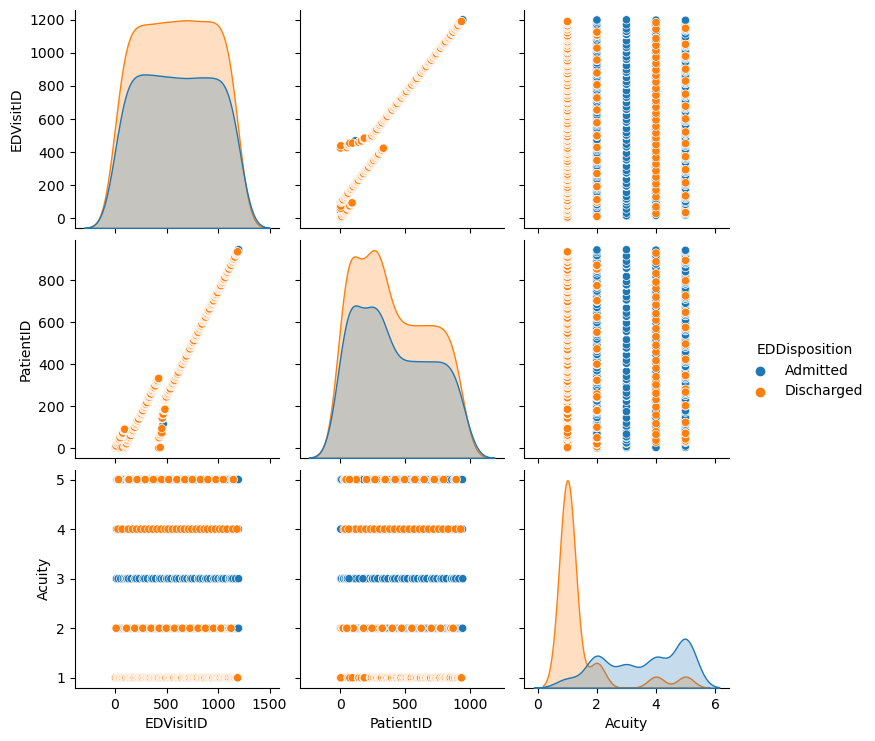

In [7]:
sns.pairplot(edvisits,hue='EDDisposition')

# Q4 Connect to sql and write a query to get list of Provider names whose providername is starting with letter T.

In [9]:
conn=sql.connect('Provider_SQL.db')
Providers=pd.read_excel(r"./datasets/HospitalDatabase.xlsx","Providers")
Providers.to_sql('Providers',conn,if_exists='replace',index=False)
cur=conn.cursor()
select_all="select * from Providers where ProviderName LIKE 'T%'"
rows=cur.execute(select_all).fetchall()
for r in rows:
    print(r)
    conn.close()

(4, 'Ted Texas', 'Pediatrics', '1993-12-23 21:33:52.299000')
(8, 'Ted Green', 'Pediatrics', '1996-05-30 06:14:52.539000')
(9, 'Ted Black', 'Pediatrics', '1997-02-20 08:01:10.211000')
(19, 'Tyler Conner', 'Cardiology', '2003-07-09 02:41:40.410000')
(34, 'Tony Creed', 'PrimaryCare', '2010-04-28 14:11:26.802000')
(37, 'Trent Tye', 'PrimaryCare', '2013-01-12 15:32:21.137000')


# Q5 Create a bar chart between expectedLOS & Primary diagnosis

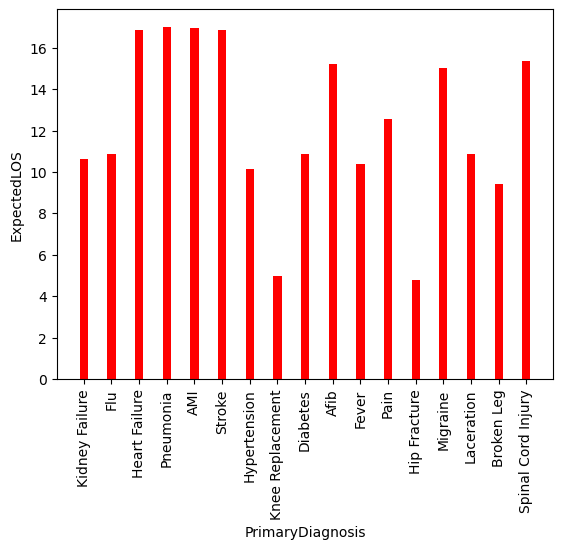

In [10]:
y=readmissionregistry['ExpectedLOS']
x=readmissionregistry['PrimaryDiagnosis']
plt.bar(x,y,width=0.3,label='Hospital Dataset',color='Red')
plt.ylabel('ExpectedLOS')
plt.xlabel('PrimaryDiagnosis')
plt.xticks(rotation='vertical')
plt.show()

# Q6 Find the last name of the patients, by getting the first name from the user.

In [30]:
# get the first name from the user
first_name = input("Enter the first name: ")

# filter the dataframe to find matching last names
last_names = patients.loc[patients['FirstName'] == first_name, 'LastName'].values

# print the matching last names
if len(last_names) == 0:
    print("No patients found with that first name.")
else:
    print("Matching last names:")
    for last_name in last_names:
        print(last_name)

Enter the first name: Far
Matching last names:
Myers
Pardon
Rudinger



# Q 7 Find the list of patients whose ExpectedLOS is greater than the value given by the user.

In [31]:
expLOS=pd.merge(patients,discharges,on='PatientID')
expLOS=expLOS[(expLOS['ExpectedLOS']> float(input("Enter a number")))]
expLOS[['FirstName','LastName','ExpectedLOS']]

Enter a number14


,FirstName,LastName,ExpectedLOS
6,Alexandra,Green,16.472257
8,Granny,Man,14.787084
18,Daugherty,Conner,15.349671
31,Mike,Bing,15.415514
43,Abigail,Renter,14.948765
...,...,...,...
687,Ab,McGonigle,15.471412
695,Hahn,Baudy,14.932265
703,Ermentrude,Adamsson,14.078233
706,Stacy,Loxly,14.646676


# Q8 Using Sunburst chart display the providers name by their provider speciality,considering their experience

In [28]:
providers['ProviderDateOnStaff']=pd.to_datetime(providers['ProviderDateOnStaff'],format='%m/%d/%Y')
providers['Experience']=pd.to_datetime('today')-providers['ProviderDateOnStaff']  
fig=px.sunburst(providers,path=['ProviderName','ProviderSpecialty'],values='Experience')
fig.show()


# Q9 Create a subplot on x=np.arange(0,10,0.1), y=np.sin(np.pi*x)+x with 2 rows and 2 columns with object oriented approach

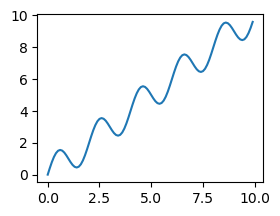

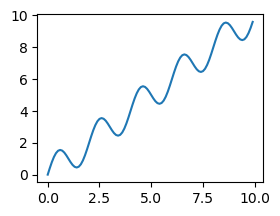

In [5]:
fig = plt.figure()  # a new figure window
ax = fig.add_subplot(2, 2, 2)  # specify (nrows, ncols, axnum)
import numpy as np
x = np.arange(0, 10, 0.1)
y = np.sin(np.pi * x) + x
ax.plot(x, y)
display(fig)  

# Q10 Get the number of patients based on ReasonForVisit and EDDisposition(use stack/unstack functions)

In [26]:
eddad=edunique['EDDisposition'].replace('admitted','Admitted',inplace=True)
edddis=edunique['EDDisposition'].replace('discharged','Discharged',inplace=True)
stack=edunique.groupby(['EDDisposition','ReasonForVisit']).agg(patcnt=('PatientID','count'))
stack.stack()


EDDisposition  ReasonForVisit             
Admitted       Accident             patcnt     37
               Bleeding             patcnt     14
               Car Accident         patcnt     16
               Chest Pain           patcnt     80
               Fever                patcnt     40
               Gun Shot             patcnt     16
               Migraine             patcnt     41
               Pneumonia            patcnt    122
               Shortness of Breath  patcnt     65
               Stomach Ache         patcnt     29
Discharged     Bleeding             patcnt     11
               Chest Pain           patcnt     11
               Fever                patcnt    132
               Intoxication         patcnt     23
               Laceration           patcnt     22
               Migraine             patcnt     75
               Pneumonia            patcnt     49
               Shortness of Breath  patcnt     55
               Stomach Ache         patcnt    107
dtype: 

In [27]:
stack.unstack()

patcnt                                                   \
ReasonForVisit Accident Bleeding Car Accident Chest Pain  Fever Gun Shot   
EDDisposition                                                              
Admitted           37.0     14.0         16.0       80.0   40.0     16.0   
Discharged          NaN     11.0          NaN       11.0  132.0      NaN   

                                                                               \
ReasonForVisit Intoxication Laceration Migraine Pneumonia Shortness of Breath   
EDDisposition                                                                   
Admitted                NaN        NaN     41.0     122.0                65.0   
Discharged             23.0       22.0     75.0      49.0                55.0   

                             
ReasonForVisit Stomach Ache  
EDDisposition                
Admitted               29.0  
Discharged            107.0

# Q11 Create a dataframe with date and time as columns,where the values are the discharge time from readmissionregistry sheet

In [14]:
newdf=pd.DataFrame().assign(Date=readmissionregistry['DischargeDate'].dt.date, Time=readmissionregistry['DischargeDate'].dt.time)
newdf

,Date,Time
0,2018-01-04,19:59:31.391000
1,2018-01-04,21:28:51.898000
2,2018-01-04,22:28:23.672000
3,2018-01-05,05:47:04.933000
4,2018-01-05,14:18:30.029000
...,...,...
715,2018-03-07,21:22:10.061000
716,2018-03-08,02:43:18.749000
717,2018-03-08,09:27:18.377000
718,2018-03-10,06:06:12.068000


# Q12 Create a visulization on the count of patients based on primary diagnosis

In [44]:
cntp=readmissionregistry.groupby(['PrimaryDiagnosis']).agg(count_Of_Patients=('PatientID','count'))

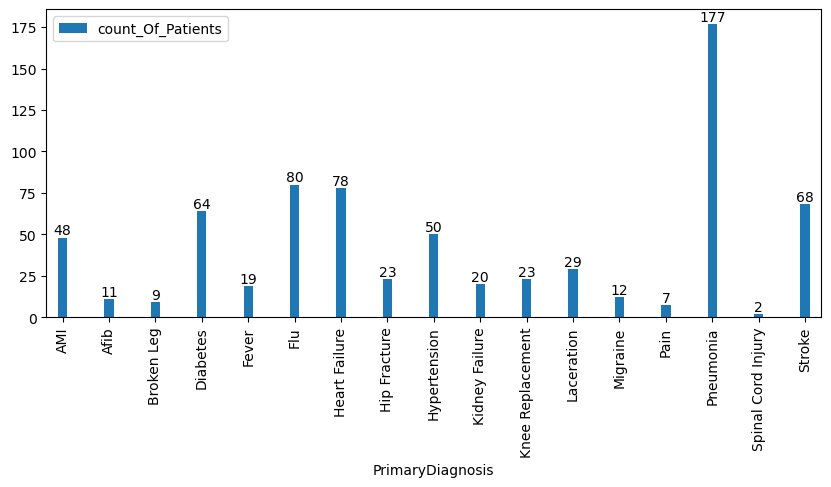

In [21]:
ax = cntp.plot.bar(figsize=(10,4), width=0.2)
ax.bar_label(ax.containers[0], label_type='edge')
plt.xticks(rotation='vertical')
plt.show()

# Q13 Create a bar chart on service and expected length of stay

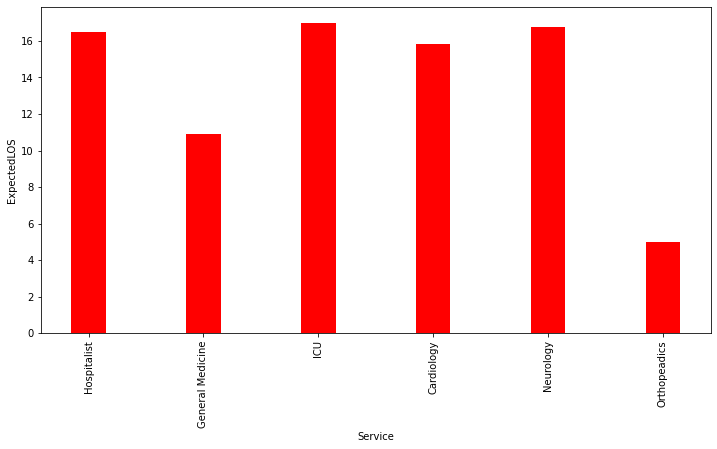

In [55]:
y=readmissionregistry['ExpectedLOS']
x=readmissionregistry['Service']
plt.figure(figsize = (12,6))
plt.bar(x,y,width=0.3,label='Hospital Dataset',color='Red')
plt.ylabel('ExpectedLOS')
plt.xlabel('Service')
plt.xticks(rotation='vertical')
plt.show()

# Q14 Find the count of Spanish Speaking patients

In [16]:
patients[(patients['Language']=='Spanish')].agg(count_Of_Patients=('PatientID','count'))

,PatientID
count_Of_Patients,110


# Q15 Create a boxplot on ExpectedLOS by taking service into account

<AxesSubplot:xlabel='ExpectedLOS', ylabel='Service'>

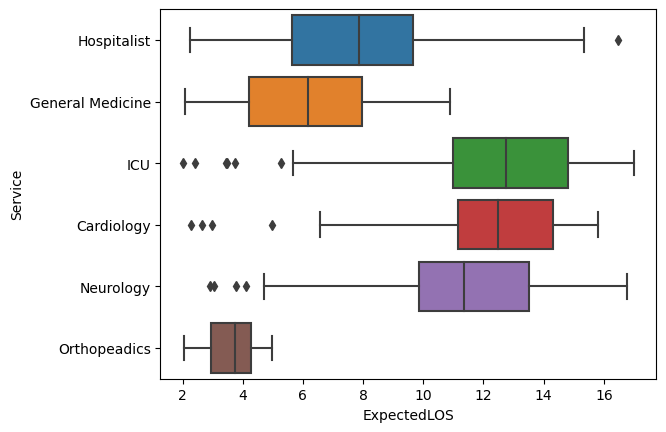

In [6]:
sns.boxplot(data=readmissionregistry, x="ExpectedLOS", y="Service")

# Q16 write a code snippet to print different ProviderSpeciality(use groupby and get the list of the groups)

In [29]:

providers_grp=providers.groupby('ProviderSpecialty')['ProviderID'].apply(list)
providers_grp

ProviderSpecialty
Cardiology                      [17, 18, 19, 20, 21, 22, 23, 24]
Pediatrics                           [1, 2, 3, 4, 5, 6, 7, 8, 9]
PrimaryCare    [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 3...
Surgery                             [10, 11, 12, 13, 14, 15, 16]
Name: ProviderID, dtype: object

# Q17 Connect to sql and write a query to get Ambulatory visit record;s year.

In [11]:
conn=sql.connect('AmbulatoryVisits_SQL.db')
import datetime
ambulatoryvisits=pd.read_excel(r"./datasets/HospitalDatabase.xlsx","AmbulatoryVisits")
ambulatoryvisits.to_sql('ambulatoryvisits',conn,if_exists='replace',index=False)
cur=conn.cursor()
select_all= "select strftime('%Y',DateofVisit) as Year from ambulatoryvisits" 
rows=cur.execute(select_all).fetchall()
for r in rows:
   print(r)
   conn.close()

('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)
('2019',)


# Q 18 Display using a donut chart the patient count in the ReAdmissionRegistry.

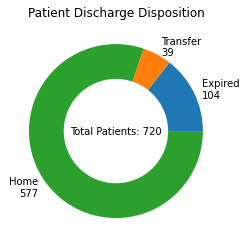

In [6]:
pat_cnt=readmissionregistry.groupby('DischargeDisposition')['PatientID'].count()

#Value counts
trsfr = readmissionregistry['DischargeDisposition'].value_counts()['Transfer']
exp = readmissionregistry['DischargeDisposition'].value_counts()['Expired']
home = readmissionregistry['DischargeDisposition'].value_counts()['Home']

# create labels
dd=['Expired','Transfer','Home']
dd1=[exp,trsfr,home]

# Get the patient counts for each disposition and calculate the total count
total_patients = sum( pat_cnt.tolist())

# Create a list of labels with two lines of text
labels = [f'{label1}\n{label2}' for label1, label2 in zip(dd, dd1)]

# Create a pie chart with two labels
plt.pie(dd1, labels = labels)
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Patient Discharge Disposition')

# Display the total count of patients
plt.text(0, 0, f'Total Patients: {total_patients}', ha='center', va='center')
plt.show()


# Q 19 Show the records where the ExpectedLos is greater than the difference between the max and min ExpectedLos.

In [3]:
readmissionregistry['max_min']=readmissionregistry['ExpectedLOS'].max()-readmissionregistry['ExpectedLOS'].min()
readmissionregistry.loc[readmissionregistry['ExpectedLOS']>readmissionregistry['max_min']]

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag,max_min
6,549,8,2018-01-01,2018-01-07 15:39:25.987,Home,Hospitalist,Pneumonia,16.472257,0.526198,1.0,5.0,1.0,14.985239
18,252,19,2018-01-01,2018-01-17 14:13:23.627,Home,Hospitalist,Stroke,15.349671,0.478003,NaN,NaN,NaN,14.985239
31,550,27,2018-01-02,2018-01-13 07:34:46.603,Home,ICU,Pneumonia,15.415514,0.774480,1.0,5.0,1.0,14.985239
46,391,41,2018-01-03,2018-01-10 00:57:05.440,Home,Cardiology,Afib,14.995421,0.385435,NaN,NaN,NaN,14.985239
64,609,59,2018-01-04,2018-01-09 01:18:34.182,Home,ICU,Pneumonia,15.118850,0.967396,1.0,2.0,1.0,14.985239
88,144,83,2018-01-05,2018-01-17 11:00:10.366,Home,ICU,Pneumonia,15.622700,0.395238,1.0,1.0,1.0,14.985239
95,145,90,2018-01-06,2018-01-15 03:16:35.614,Home,ICU,Pneumonia,16.161806,0.824220,1.0,3.0,1.0,14.985239
100,444,95,2018-01-06,2018-01-19 02:57:34.514,Home,ICU,Stroke,16.838918,0.958035,1.0,14.0,1.0,14.985239
113,445,108,2018-01-07,2018-01-22 06:49:20.132,Home,ICU,Stroke,15.660602,0.639241,1.0,2.0,1.0,14.985239
118,114,113,2018-01-08,2018-01-14 22:04:11.532,Home,ICU,Pneumonia,15.895307,0.629358,1.0,5.0,1.0,14.985239


# Q 20 Using a bar chart, which Service had the lowest count of Expected Mortality?

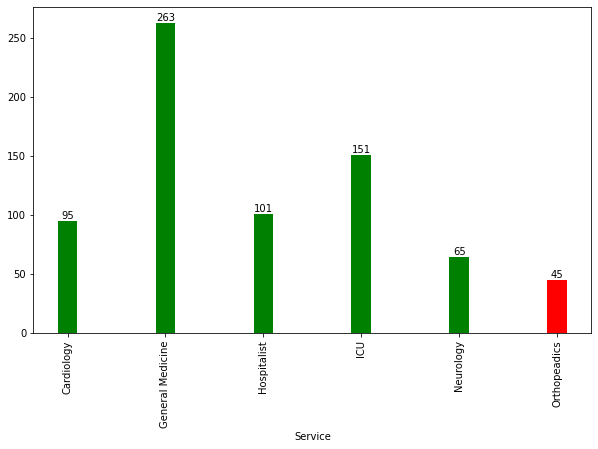

In [59]:
import matplotlib.pyplot as plt
exp_mor=discharges.groupby('Service')['ExpectedMortality'].count()
min_value = exp_mor.min()
colors = ['r' if x == min_value else 'g' for x in exp_mor]
ax = exp_mor.plot.bar(figsize=(10,6), width=0.2 , color = colors)
ax.bar_label(ax.containers[0], label_type='edge')
plt.xticks(rotation='vertical')
plt.show()


# Q 21 Which reason of visit has maximum mortality rate.

In [87]:
ed_dis=pd.merge(edunique,discharges,on='PatientID')
grp=ed_dis.groupby('ReasonForVisit').agg(Max_Mortality=('ExpectedMortality','max'))
grp.sort_values('Max_Mortality', ascending=False).head(1)


,Max_Mortality
ReasonForVisit,
Pneumonia,0.989945


# Q22.Display the average LOS based on Service and Discharge Disposition(Maintain the column Hierarchy).

In [65]:
# create a pivot table with Service as the rows, Discharge Disposition as the columns, and mean ExpectedLOS as the values
avg_LOS = pd.pivot_table(readmissionregistry, values='ExpectedLOS', index='Service', columns='DischargeDisposition', aggfunc='mean')

# display the pivot table with the column hierarchy
avg_LOS

DischargeDisposition,Expired,Home,Transfer
Service,,,
Cardiology,9.202626,12.864936,11.818403
General Medicine,5.874003,6.105696,6.116124
Hospitalist,6.775636,8.009046,5.701389
ICU,9.919063,13.451158,11.989238
Neurology,9.384312,12.538859,11.469198
Orthopeadics,3.943883,3.508337,4.842255


# Q23. Add column 'Age' in Patient table

In [4]:
import pandas as pd
patients['DateOfBirth']= pd.to_datetime(patients['DateOfBirth'])

patients['Age'] = (pd.to_datetime('today')- patients["DateOfBirth"]).astype('<m8[Y]').astype(int)

patients.head()

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,63
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,37
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,46
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,54
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,60


# Q24. Using arrays and loops, find the count of patients based on gender.

In [5]:
patients["Gender"].value_counts()

Male      537
Female    408
Name: Gender, dtype: int64

In [66]:
# create arrays to store counts for each gender
gender_counts = np.zeros(2, dtype=int)

# loop through the rows of the DataFrame
for index, row in patients.iterrows():
    if row['Gender'] == 'Male':
        gender_counts[0] += 1
    elif row['Gender'] == 'Female':
        gender_counts[1] += 1

# print the gender counts
print("Male count:", gender_counts[0])
print("Female count:", gender_counts[1])

Male count: 537
Female count: 408


# Q 25.Create bins to segregate Patients with 'Mild Hypertension','Moderate ','High Hypertension','Severe Hypertension'. Create a new column to show your analysis.

In [125]:
bins=[99,109,110,140,190]
ambulatoryvisits.rename(columns={'PatientMRN':'PatientID'},inplace=True)
labels=['Mild Hypertension','Moderate Hipertension','High Hypertension','Severe Hypertension']
ambulatoryvisits['SBP Range']=pd.cut(ambulatoryvisits['BloodPressureSystolic'],bins=bins, labels=labels, right=False)
SBP_Range=ambulatoryvisits.loc[:,['PatientID','BloodPressureSystolic','SBP Range']]
SBP_Range

,PatientID,BloodPressureSystolic,SBP Range
0,840,188.0,Severe Hypertension
1,820,179.0,Severe Hypertension
2,879,133.0,High Hypertension
3,884,132.0,High Hypertension
4,32,131.0,High Hypertension
...,...,...,...
945,873,187.0,Severe Hypertension
946,855,182.0,Severe Hypertension
947,865,150.0,Severe Hypertension
948,635,177.0,Severe Hypertension


# 26. Plot a graph to show the distribution of expected mortality

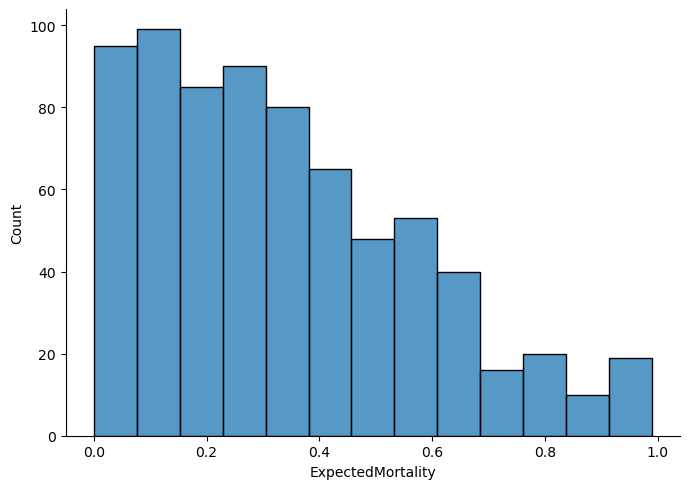

In [7]:
sns.displot(
    data = readmissionregistry,
     x="ExpectedMortality",
     kind="hist",
    aspect=1.4
)

# 27. Which departmentID has maximum number of visits scheduled

In [8]:
result = ambulatoryvisits.groupby(['VisitDepartmentID'])['VisitDepartmentID'].count()
dept_with_max_visits = result.idxmax()
max_visits = result.max()
print("Department with maximum number of visits :",dept_with_max_visits,
     "\nTotal number if visits for department", dept_with_max_visits, ":", max_visits)

Department with maximum number of visits : 11 
Total number if visits for department 11 : 102


# 28.Find the visit type with maximum 'No Show'

In [40]:
occur=ambulatoryvisits.loc[ambulatoryvisits.VisitStatus=='No Show'].groupby(['VisitType','VisitStatus']).agg(max=('VisitStatus','count'))
occur.sort_values(by='max',ascending=False).head(1)

,,max
VisitType,VisitStatus,
Telemedicine,No Show,74


# 29.Which demographic patients are prone to get stroke?

In [10]:
stroke_list = discharges[discharges.PrimaryDiagnosis == 'Stroke']['PatientID'].to_list()
stroke_df = patients[patients['PatientID'].isin(stroke_list)]
#print(stroke_df)
demographics = (stroke_df.groupby(['Race','Language'])['Race']).count().to_dict()
print('Patients prone to get stroke based on demographics is : ',max(demographics,key=demographics.get))

Patients prone to get stroke based on demographics is :  ('Black/African-American', 'English')


# Q30.Using loc , get the details of the providers where providerId is between 11 and 20 and ProviderSpecialty is Surgery.

In [11]:
providers.loc[(providers.ProviderID.between(11,20)) & (providers.ProviderSpecialty =='Surgery')]

,ProviderID,ProviderName,ProviderSpecialty,ProviderDateOnStaff
10,11,Kim Kimberly,Surgery,1998-05-10 14:47:29.468
11,12,Sarah Ab,Surgery,1998-08-18 05:22:40.762
12,13,Abigail Marriot,Surgery,1998-11-08 12:25:45.705
13,14,Dave Yu,Surgery,1999-06-26 16:18:57.436
14,15,Christian Saint,Surgery,2000-08-27 00:12:40.326
15,16,Perry Pardon,Surgery,2001-02-13 11:49:17.862


# 31.If patient's gender is Female, add Ms.to the name and for male patients add Mr. to the name

In [12]:
def add_prefix(row):
     if row['Gender'] == 'Female':
        return 'Ms.' + row['FirstName']+ '' + row['LastName']
     elif row['Gender'] == 'Male':
        return 'Mr.' + row['FirstName']+ '' + row['LastName']
     else:
        return row['Firstname'] + '' + row['LastName']
#Apply the function to the DataFrame and create a new column with modified names
patients['ModifiedName'] = patients.apply(add_prefix, axis=1)

#Display the modified DataFrame
patients.head()

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,ModifiedName
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,Mr.LanniSue
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,Mr.FarMyers
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,Mr.Devlin Michael
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,Mr.CarmineTexas
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,Mr.Tann Bama


# Q32.Create a pie chart by taking Service= ["ICU", "Neurology", "General", "Medicine"] & ExpectedLOS=[10,5,7,9] & explode the wedge with highest LOS.

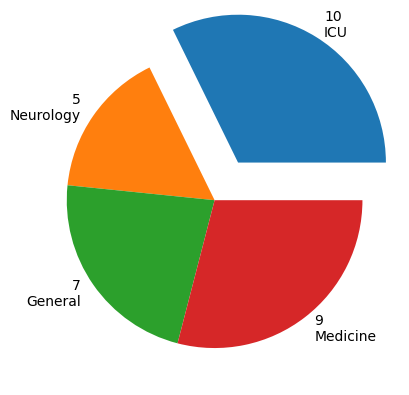

In [23]:
ExpectedLOS=[10,5,7,9]
Service=["ICU","Neurology","General","Medicine"]
labels = [f'{label1}\n{label2}' for label1, label2 in zip(ExpectedLOS,Service)]

plt.pie(ExpectedLOS,labels=labels,explode=[0.3,0,0,0])
plt.show()


# 33. Plot a graph to show the distribution of expected length of stay

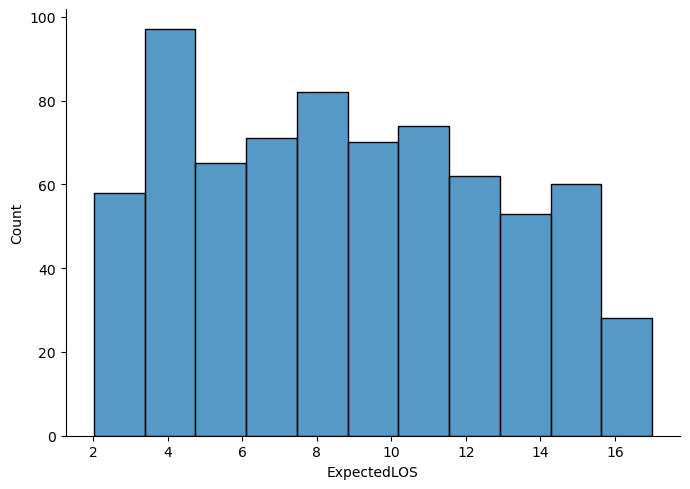

In [13]:
sns.displot(
    data=readmissionregistry,
    x="ExpectedLOS",
    kind="hist",
    aspect=1.4
)

# 34.Create a WordCloud Chart with Reason For Visit

In [14]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


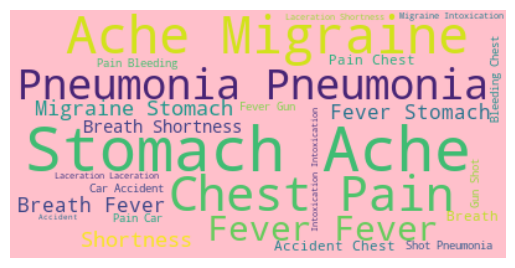

In [15]:
from wordcloud import WordCloud

text = " ".join(review for review in edvisits.ReasonForVisit)

# Generate a word cloud
wordcloud = WordCloud(background_color = 'pink').generate(text)

#Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Q35.np.arange(1,31).reshape(6,5), find array slicing to get the elements 4,5,24,25,29,30. When the value is less than 6, print as -1,else print 99.

In [21]:
arry=np.arange(1,31).reshape(6,5)
arry

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25],
       [26, 27, 28, 29, 30]])

In [20]:
# Get the desired elements using array slicing
desired_elements = np.concatenate((arry[0:1, 3:], arry[4:, 3:]), axis=None)

#Print the result
print(desired_elements)

[ 4  5 24 25 29 30]


In [22]:
# when the value is less than 6, print as -1, else print 99
for elem in desired_elements:
    if elem < 6:
        print("-1", end=" ")
    else:
        print("99", end=" ")

-1 -1 99 99 99 99 

# Q 36.Retrieve the count of patients who are prone to hypertension crisis. (SBP>180 & DBP>120)

In [145]:
ambulatoryvisits[(ambulatoryvisits['BloodPressureSystolic']>180) & 
                     (ambulatoryvisits['BloodPressureDiastolic']>120)]['PatientID'].count()


101

# Q37.Display the data where actual LOS is greater than expected LOS.

In [23]:
#convert admission and discharge dates to datetime objects
readmissionregistry['Admissiondate']=pd.to_datetime(readmissionregistry['AdmissionDate'])
readmissionregistry['Dischargedate']=pd.to_datetime(readmissionregistry['DischargeDate'])

#Calculate the actual LOS by subtracting admission date from discharge date
readmissionregistry['ActualLOS']=(readmissionregistry['Dischargedate']-readmissionregistry['Admissiondate']).dt.days

#dispaly rows where actual LOS is greater than expectedLOS
readmissionregistry[readmissionregistry['ActualLOS']>readmissionregistry['ExpectedLOS']]

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag,Admissiondate,Dischargedate,ActualLOS
3,587,5,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0,2018-01-01,2018-01-05 05:47:04.933,4
10,568,12,2018-01-01,2018-01-09 09:21:47.300,Home,Hospitalist,Pneumonia,7.162811,0.671473,1.0,5.0,1.0,2018-01-01,2018-01-09 09:21:47.300,8
11,107,13,2018-01-01,2018-01-09 21:34:42.467,Home,Hospitalist,Flu,4.554479,0.266584,1.0,5.0,1.0,2018-01-01,2018-01-09 21:34:42.467,8
14,305,15,2018-01-01,2018-01-10 17:24:37.526,Home,Hospitalist,Hypertension,6.369161,0.646007,NaN,NaN,NaN,2018-01-01,2018-01-10 17:24:37.526,9
16,439,17,2018-01-01,2018-01-12 14:16:51.024,Home,Hospitalist,Kidney Failure,8.357081,0.630937,NaN,NaN,NaN,2018-01-01,2018-01-12 14:16:51.024,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,533,737,2018-02-22,2018-03-07 19:50:58.083,Home,ICU,Pneumonia,10.563688,0.583075,NaN,NaN,NaN,2018-02-22,2018-03-07 19:50:58.083,13
716,548,739,2018-02-22,2018-03-08 02:43:18.749,Home,ICU,Pneumonia,11.355456,0.088518,NaN,NaN,NaN,2018-02-22,2018-03-08 02:43:18.749,14
717,509,740,2018-02-22,2018-03-08 09:27:18.377,Home,Hospitalist,Pneumonia,4.819882,0.503308,NaN,NaN,NaN,2018-02-22,2018-03-08 09:27:18.377,14
718,605,741,2018-02-22,2018-03-10 06:06:12.068,Home,General Medicine,Flu,3.123064,0.655870,NaN,NaN,NaN,2018-02-22,2018-03-10 06:06:12.068,16


# Q 38.Using loc, retrieve the firstname and lastname of patients between indices 101 and 200.

In [132]:
patients.loc[101:200,['FirstName','LastName']]

,FirstName,LastName
101,Gipsy,Frankton
102,Jethro,Wharin
103,Viv,Aylward
104,Swift,Dreschler
105,Fadel,Jacquemard
...,...,...
196,Noam,Laguerre
197,Arie,Bayless
198,Janaye,O'Mohun
199,Fonz,Group


# Q 39.Delete the column 'DischargeDispostion' iteratively.


In [107]:
dis1=discharges
for col in dis1.columns:
    if 'DischargeDisposition' in col:
        del dis1[col]
dis1

,AdmissionID,PatientID,AdmissionDate,DischargeDate,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality
0,1,9,2018-01-01,2018-01-07 18:06:06.408,Cardiology,AMI,9.646857,0.061540
1,257,93,2018-01-06,2018-01-18 02:59:04.667,Cardiology,Broken Leg,6.816558,0.628827
2,152,101,2018-01-07,2018-01-11 16:16:06.782,Cardiology,Kidney Failure,6.580273,0.573887
3,361,102,2018-01-07,2018-01-15 04:48:33.134,Cardiology,Afib,12.794536,0.222163
4,258,103,2018-01-07,2018-01-15 13:32:36.157,Cardiology,Broken Leg,2.639297,0.055468
...,...,...,...,...,...,...,...,...
715,715,716,2018-02-21,2018-03-06 03:31:05.262,ICU,Heart Failure,11.362095,0.370695
716,698,723,2018-02-22,2018-02-26 15:09:02.584,ICU,Heart Failure,10.262312,0.812930
717,704,724,2018-02-22,2018-02-27 07:59:32.385,General Medicine,Pneumonia,6.036234,0.094128
718,716,733,2018-02-22,2018-03-05 12:31:55.958,ICU,Heart Failure,13.323413,0.490892


# Q40.Create a jointplot on expected mortality & expected length of stay.

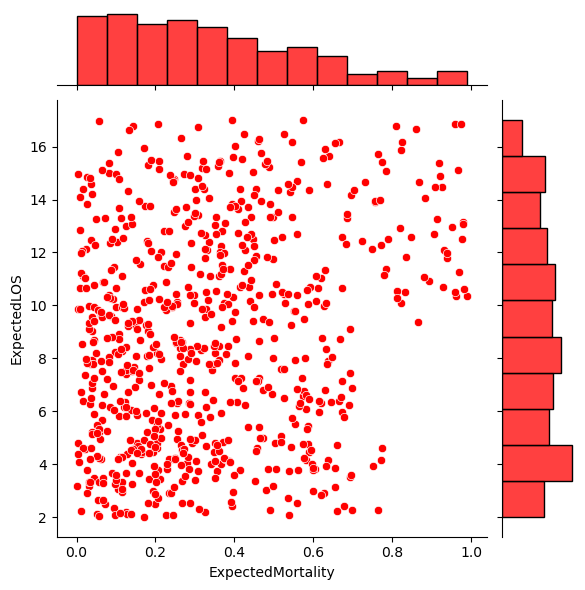

In [24]:
sns.jointplot(x='ExpectedMortality',y='ExpectedLOS',data=discharges,color='red')
# Show the plot
plt.show()

## Q41 Find the age prone to get stroke.

In [25]:
# Make a copy of the dataset
patients1 = patients.copy()
patients1['DateOfBirth'] = pd.to_datetime(patients['DateOfBirth'])
# Add age to the dataset
patients1['Age'] = (pd.to_datetime('today') - patients1['DateOfBirth']).astype('<m8[Y]').astype(int)
patients1.head()

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,63
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,37
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,46
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,54
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,60


In [26]:
# merge the two dataframes based on Patient ID
df_merged = pd.merge(patients1, readmissionregistry, on='PatientID', how='left')
df_merged = df_merged.drop(['DateOfBirth'], axis=1)

# extract age values of patients with a stroke diagnosis
stroke_vst = df_merged[df_merged['PrimaryDiagnosis']=='Stroke']

most_prone_age = stroke_vst.groupby('Age').size().sort_values(ascending=False).index[0]
print(f"The age group that is most prone to getting a stroke is {most_prone_age}.")

The age group that is most prone to getting a stroke is 58.


## Q42 Calculate mortality by diagnosis.

In [79]:
# Calculate mortality by diagnosis
mortality = discharges.groupby('PrimaryDiagnosis').agg(Mortality=('ExpectedMortality','mean'))
mortality

,Mortality
PrimaryDiagnosis,
AMI,0.235146
Afib,0.304235
Broken Leg,0.275440
Diabetes,0.286476
Fever,0.296601
Flu,0.272976
Heart Failure,0.385678
Hip Fracture,0.373310
Hypertension,0.296555


## Q43 Details of the patients whose firstname or lastname contains string "lau" , should be case insensitive.

In [28]:
# filter for patients whose first name or last name contains "lau" (case-insensitive)
patients_name = patients[patients["FirstName"].str.contains("lau", case=False) | patients["LastName"].str.contains("lau", case=False)]

# print out the filtered dataset
patients_name

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language
282,283,Lauren,Gaskal,1962-05-08 01:54:00.111,Female,Black/African-American,English
322,323,Lauren,Foort,1960-06-23 20:07:53.045,Female,White,English
369,370,Zulauf,Ellingham,1982-12-17 16:27:56.391,Female,White,English
382,383,Zulauf,LLC,1969-03-16 07:48:49.338,Female,White,English
454,455,Zulauf,Alvar,1961-10-02 08:24:17.334,Female,White,English
463,464,Zulauf,Manske,1965-06-22 02:49:28.667,Female,White,English
818,819,Zulauf,Bitcheno,1967-04-02 07:17:53.635,Female,White,English
830,831,Zulauf,O'Shavlan,1970-05-17 08:09:28.988,Female,White,English
850,851,Lemmy,Klausen,1973-06-18 06:19:43.475,Female,White,English
906,907,Jerrilyn,Klausen,1979-09-04 13:05:57.870,Male,Black/African-American,English


## Q44 Display data by splitting age in 4 quartiles and labeling the quartiles.

In [83]:
# Use qcut to split the 'Age' column into 4 quartiles and label them
patients['Age Quartile'] = pd.qcut(patients['age'], q=4, labels=['1st Quartile', '2nd Quartile', '3rd Quartile', '4th Quartile'])

# Display the resulting DataFrame
patients

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,age,Age Quartile
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,63.0,4th Quartile
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,37.0,1st Quartile
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,46.0,2nd Quartile
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,54.0,3rd Quartile
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,60.0,4th Quartile
...,...,...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English,36.0,1st Quartile
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English,52.0,3rd Quartile
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English,40.0,1st Quartile
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English,59.0,4th Quartile


## Q45 Usage of Enumeration in Python with any example.

In [23]:
# Length of the word
words = ['apple', 'banana', 'cherry', 'orange','grape','kiwi','pineapple']
lengths = []

for index, word in enumerate(words):
    if len(word) > 5:
        lengths.append((index, len(word)))

print(lengths)


[(1, 6), (2, 6), (3, 6), (6, 9)]


## Q46 Count of canceled status.

In [19]:
num_cancelled = ambulatoryvisits[ambulatoryvisits['VisitStatus']== 'Canceled'].shape[0]
print("Number of cancelled status:", num_cancelled)

Number of cancelled status: 60


## Q47 Display the patient details with maximum pulse pressure.

In [18]:
# Calculate the pulse pressure column
ambulatoryvisits['PulsePressure'] = ambulatoryvisits['BloodPressureSystolic'] - ambulatoryvisits['BloodPressureDiastolic']

# Sort the DataFrame by the pulse pressure column in descending order and select the first row
max_pp = ambulatoryvisits.sort_values(by='PulsePressure', ascending=False).head(1)

# Display the patient details with the maximum pulse pressure
max_pp

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus,PulsePressure
195,847,865,35,2019-03-25,2019-03-12 10:02:35.807,4,Follow Up,188.0,117.850163,60.329856,Completed,70.149837


## Q48 Create a heat map to show the correlation between the column values of Edvisits.

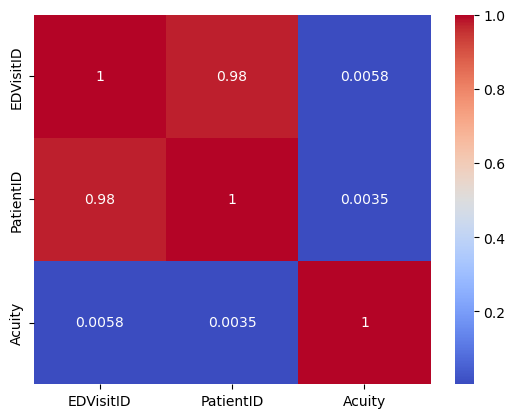

In [24]:
# Compute the correlation matrix
corr_matrix = edvisits.corr()

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

## Q49 Plot a graph by counting the no. of patients in each department.

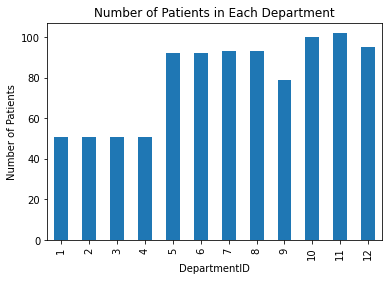

In [16]:
# group the patients by department and count the number of patients in each department

result = ambulatoryvisits.groupby(['VisitDepartmentID'])['VisitID'].count()

# plot a bar graph of the department counts

result.plot(kind="bar")
plt.title("Number of Patients in Each Department")
plt.xlabel("DepartmentID")
plt.ylabel("Number of Patients")
plt.show()

## Q50 Display patient details where "ReasonForVisit" is either 'Migraine' or 'Pneumonia' and Acuity is 2 or more.

In [15]:
# filter the dataframe for patients with ReasonForVisit = 'Migraine' or 'Pneumonia' and Acuity >= 2
visit_reason = edvisits[(edvisits["ReasonForVisit"].isin(["Migraine", "Pneumonia"])) & (edvisits["Acuity"] >= 2)]

# print out the filtered dataframe
visit_reason

,EDVisitID,PatientID,VisitDate,EDDischargeTime,Acuity,ReasonForVisit,EDDisposition
1,12,12,2020-01-01 02:45:40.302,2020-01-02 02:00:00.517,2,Migraine,Admitted
3,14,14,2020-01-01 03:12:19.349,2020-01-01 04:32:29.142,3,Migraine,Admitted
11,29,29,2020-01-01 06:51:28.639,2020-01-02 05:57:01.639,2,Pneumonia,Admitted
12,30,30,2020-01-01 07:25:54.177,2020-01-01 23:30:20.151,3,Pneumonia,Admitted
13,31,31,2020-01-01 07:32:51.917,2020-01-01 19:55:46.991,4,Pneumonia,Admitted
...,...,...,...,...,...,...,...
1107,1027,773,2020-01-13 15:27:07.001,2020-01-14 13:27:31.778,2,Migraine,Discharged
1150,1104,850,2020-01-14 10:46:08.650,2020-01-14 20:52:26.031,2,Migraine,Discharged
1152,1106,852,2020-01-14 11:19:41.401,2020-01-15 02:47:17.353,2,Migraine,Discharged
1160,1122,868,2020-01-14 15:05:58.777,2020-01-15 13:53:02.550,2,Migraine,Discharged


## Q51 Take the ReasonForVisit from user, find the number of patients admitted with that ReasonForVisit.

In [14]:
# prompt the user for a ReasonForVisit
reason = input("Enter the ReasonForVisit: ")

# filter the dataframe for patients with the specified ReasonForVisit
filtered_df = edvisits[edvisits["ReasonForVisit"] == reason]

# count the number of patients in the filtered dataframe
num_patients = len(filtered_df)

# print out the number of patients with the specified ReasonForVisit
print(f"{num_patients} patients were admitted with {reason}.")

Enter the ReasonForVisit: Chest Pain
109 patients were admitted with Chest Pain.


## Q52 Using indexing , loc to retrieve the row with maximum BloodPressureSystolic.

In [13]:
# find the index of the row with the maximum BloodPressureSystolic
max_idx = ambulatoryvisits["BloodPressureSystolic"].idxmax()

# retrieve the row with the maximum BloodPressureSystolic using loc
max_row = ambulatoryvisits.loc[max_idx]

# print out the row with the maximum BloodPressureSystolic
print("Row with maximum BloodPressureSystolic:")
max_row

Row with maximum BloodPressureSystolic:


VisitID                                          933
PatientMRN                                       884
ProviderID                                        27
DateofVisit                      2019-02-14 00:00:00
DateScheduled             2019-01-22 19:26:49.163000
VisitDepartmentID                                 12
VisitType                               Telemedicine
BloodPressureSystolic                          190.0
BloodPressureDiastolic                    143.989174
Pulse                                      74.976879
VisitStatus                                Completed
Name: 236, dtype: object

## Q53 Plot a graph by multiplotting on the same canvas  (Take any set of x & y values).

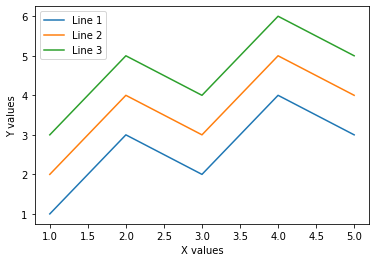

In [12]:
# Generate some data
x = [1, 2, 3, 4, 5]
y1 = [1, 3, 2, 4, 3]
y2 = [2, 4, 3, 5, 4]
y3 = [3, 5, 4, 6, 5]

# Plot the lines on the same canvas
plt.plot(x, y1, label='Line 1')
plt.plot(x, y2, label='Line 2')
plt.plot(x, y3, label='Line 3')

# Set labels and legend
plt.xlabel('X values')
plt.ylabel('Y values')
plt.legend()

# Show the plot
plt.show()



## Q54 Retrieve the row with minimum DBP using sorting technique.

In [11]:
# Sort the dataframe by DBP in ascending order
ambulatoryvisits_sorted = ambulatoryvisits.sort_values(by='BloodPressureDiastolic')

# Retrieve the row with the minimum DBP
min_dbp_row = ambulatoryvisits_sorted.iloc[0]

# Print the row with the minimum DBP
print(min_dbp_row)

VisitID                                          163
PatientMRN                                       801
ProviderID                                        11
DateofVisit                      2019-02-08 00:00:00
DateScheduled             2019-02-07 23:41:12.181000
VisitDepartmentID                                  7
VisitType                                  Follow Up
BloodPressureSystolic                          120.0
BloodPressureDiastolic                     51.695653
Pulse                                      53.310495
VisitStatus                                Completed
Name: 757, dtype: object


## Q55 Replace all the null values in ReadmissionFlag with 0.

In [10]:
# replace all null values in ReadmissionFlag with 0

readmissionregistry['ReadmissionFlag'] = readmissionregistry['ReadmissionFlag'].fillna(0)
readmissionregistry


,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
0,389,1,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,0.0,NaN,NaN
1,635,2,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562,1.0,2.0,1.0
2,606,3,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137,1.0,3.0,1.0
3,587,5,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0
4,640,6,2018-01-01,2018-01-05 14:18:30.029,Home,ICU,Heart Failure,13.650953,0.408898,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
715,521,738,2018-02-22,2018-03-07 21:22:10.061,Home,Cardiology,AMI,13.725405,0.388319,0.0,NaN,NaN
716,548,739,2018-02-22,2018-03-08 02:43:18.749,Home,ICU,Pneumonia,11.355456,0.088518,0.0,NaN,NaN
717,509,740,2018-02-22,2018-03-08 09:27:18.377,Home,Hospitalist,Pneumonia,4.819882,0.503308,0.0,NaN,NaN
718,605,741,2018-02-22,2018-03-10 06:06:12.068,Home,General Medicine,Flu,3.123064,0.655870,0.0,NaN,NaN


## Q56 Get the list of patient ID's which are not there in ReadmissionRegistry.

In [9]:
# get the patient IDs that are not present in the readmission registry
not_in_registry = list(set(patients['PatientID']) - set(readmissionregistry['PatientID']))

# print the list of patient IDs that are not in the registry
print(not_in_registry)

[916, 4, 917, 921, 562, 926, 931, 599, 936, 941, 135, 145, 890, 690, 691, 189, 704, 200, 726, 889, 224, 758, 743, 744, 745, 234, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 374, 886, 887, 888, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 891, 892, 893, 894, 907, 908, 909, 895, 911, 9

## Q57 Find reasonForVisit with highest count of acuity 5 patients.

In [7]:
acuity_max = edvisits[edvisits['Acuity']==5].groupby('ReasonForVisit')['Acuity'].count()
highest_count_reason = acuity_max.idxmax()
count = acuity_max.max()

In [8]:
print("The highest count of reason for visit  with acuity 5 is :", highest_count_reason, "\nwith a count of :",count)

The highest count of reason for visit  with acuity 5 is : Chest Pain 
with a count of : 61


## Q58 Display full name of patients who are born in 1986. 

In [121]:
patients['FullName'] = patients['FirstName'] + ' ' + patients['LastName']
patients['yearofbirth']=patients['DateOfBirth'].dt.year
patients.loc[(patients.yearofbirth==1986),['FullName']]

,FullName
23,Gabriel Joseph
24,Lincoln Brenda
29,Ala Halpert
72,Lolita Darci
164,Fadel Bernardt
238,Bentley Kippax
367,Vale Olanda
373,Britt Dureden
386,Cristabel Chatel
415,Constantia Group


## Q59 Create a bar chart by making list on Acuity & EDDisposition column (with no duplicates) & make the hatchs onto the bar by using set_hatch() method.

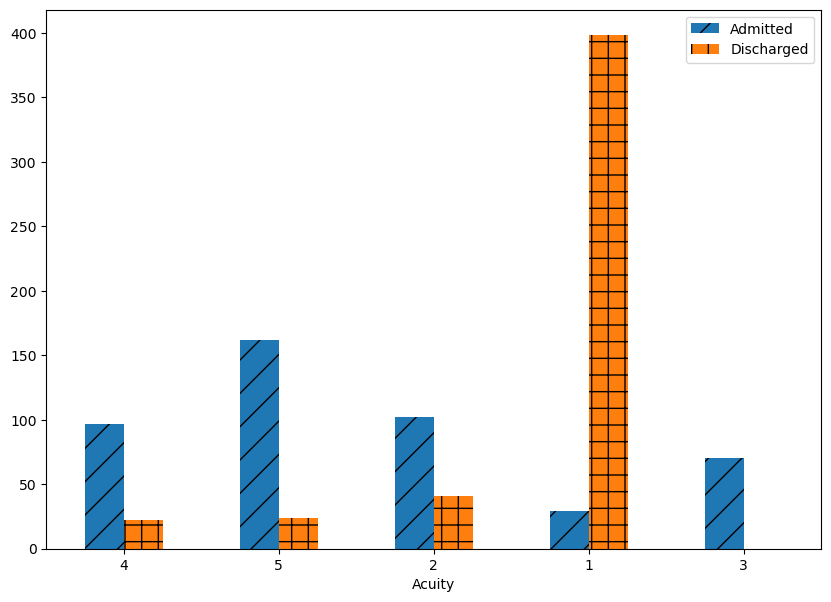

In [85]:
EDDAD=edunique['EDDisposition'].replace('admitted','Admitted',inplace=True)
EDDDIS=edunique['EDDisposition'].replace('discharged','Discharged',inplace=True)
subsetdf=edunique[["PatientID",'EDDisposition','Acuity']]
pivot_df = pd.pivot_table(subsetdf,index='Acuity', columns='EDDisposition', values='PatientID',aggfunc='count')
pivot_df
fig, ax = plt.subplots()
ax = pivot_df.sort_values('Discharged', ascending=True).plot.bar(rot=0,ax=ax,figsize=(10,7))
bars = ax.patches
patterns = ['/', '+']
hatches = []
for h in patterns:
    for i in range(int(len(bars) / len(patterns))):
        hatches.append(h)
for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
ax.legend()
plt.show()


## 60 Create a heat map on Readmission Registry table to find correlation between columns values.

/var/folders/3l/gcw2f48j2pd2dp9lxqryhf300000gn/T/ipykernel_38476/2800443596.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = readmissionregistry.corr()


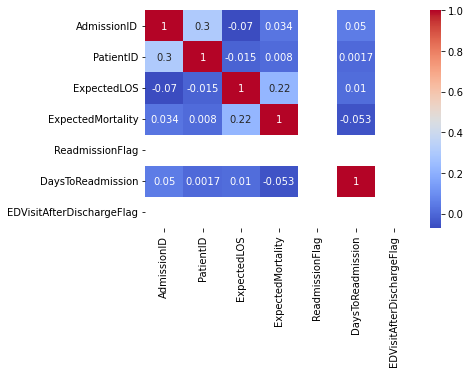

In [4]:
# Compute the correlation matrix
corr_matrix = readmissionregistry.corr()

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

# Q 61 np.arange(1,31).reshape(6,5) Find the array slicing to get the elements with values 11,12,16,17.

In [63]:
array=np.arange(1,31).reshape(6,5)
print(array)
array[2:4,0:2]

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]]


array([[11, 12],
       [16, 17]])

# Q 62 Create a dataframe with acuity and EDDisposition as the indices and the count of number of patients as the value.

In [64]:
Newdf=pd.DataFrame(edvisits.groupby(['Acuity','EDDisposition']).agg(Count_Of_Patients=('PatientID','count')))
Newdf


Count_Of_Patients
Acuity EDDisposition                   
1      Admitted                      32
       Discharged                   558
2      Admitted                     116
       Discharged                    66
3      Admitted                      81
4      Admitted                     107
       Discharged                    30
5      Admitted                     179
       Discharged                    30

# Q 63 List male patients over the age of 60 who have undergone surgery from January-March 2019.

In [123]:
from datetime import datetime
now = datetime.now()
patients['age']=(now-patients['DateOfBirth']).astype('<m8[Y]')
ambulatoryvisits.rename(columns={'PatientMRN':'PatientID'},inplace=True)
pat_ambu=pd.merge(patients,ambulatoryvisits,how='inner',on='PatientID')
pat_ambu_provid=pd.merge(pat_ambu,providers,how='left',on='ProviderID')

pat_ambu_provid=pat_ambu_provid[(pat_ambu_provid['Gender']== 'Male')&(pat_ambu_provid['age']>60)&(pat_ambu_provid['ProviderSpecialty']=='Surgery')
                                &((pat_ambu_provid['DateofVisit']> '2019-01-01')&(pat_ambu_provid['DateofVisit']< '2019-03-31'))]
pat_ambu_provid1=pat_ambu_provid.loc[:,['Gender','age','ProviderSpecialty','DateofVisit']]
pat_ambu_provid1

,Gender,age,ProviderSpecialty,DateofVisit
11,Male,61.0,Surgery,2019-01-12
15,Male,63.0,Surgery,2019-01-16
343,Male,62.0,Surgery,2019-03-01
441,Male,61.0,Surgery,2019-02-09


# Q 64 Create a dataframe by splitting provider name to firstname and lastname with names for the columns.

In [66]:
providers[['First_Name','Last_name']]=providers['ProviderName'].str.split(' ',expand=True)
providersdf=pd.DataFrame(providers)
providersdf

,ProviderID,ProviderName,ProviderSpecialty,ProviderDateOnStaff,First_Name,Last_name
0,1,Sally Sue,Pediatrics,1993-01-01 00:00:00.000,Sally,Sue
1,2,Mike Myers,Pediatrics,1993-05-02 00:00:17.695,Mike,Myers
2,3,Jordan Michael,Pediatrics,1993-06-24 21:31:46.687,Jordan,Michael
3,4,Ted Texas,Pediatrics,1993-12-23 21:33:52.299,Ted,Texas
4,5,Ala Bama,Pediatrics,1995-01-10 02:53:47.838,Ala,Bama
5,6,Harry Kane,Pediatrics,1995-07-21 03:49:03.310,Harry,Kane
6,7,Barry Bar,Pediatrics,1995-11-21 19:30:38.759,Barry,Bar
7,8,Ted Green,Pediatrics,1996-05-30 06:14:52.539,Ted,Green
8,9,Ted Black,Pediatrics,1997-02-20 08:01:10.211,Ted,Black
9,10,Fred Man,Surgery,1998-03-17 01:47:18.794,Fred,Man


# Q 65 Plot a graph showing the count of patients for the reason visited the hospital.

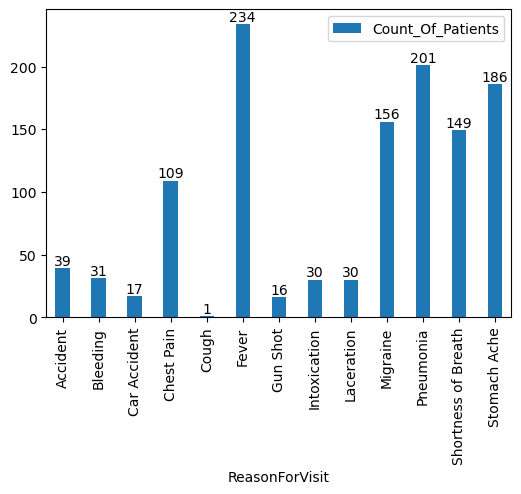

In [67]:
import matplotlib.pyplot as plt
edvisits1=edvisits.groupby('ReasonForVisit').agg(Count_Of_Patients=('PatientID','count'))
ax = edvisits1.plot.bar(figsize=(6,4), width=0.4)
ax.bar_label(ax.containers[0], label_type='edge')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()


# Q 66 Get the FirstName, LastName, DateOfBirth of the Patients whose reason for visit is Migraine. Use EDUnique Sheet for reason for visit.

In [68]:
pat_eduni=pd.merge(edunique,patients,how='right',on='PatientID')
pat_eduni.loc[pat_eduni['ReasonForVisit']=='Migraine',['FirstName','LastName','DateOfBirth','ReasonForVisit']]


,FirstName,LastName,DateOfBirth,ReasonForVisit
1,Far,Myers,1985-11-15 02:08:42.090,Migraine
2,Devlin,Michael,1976-04-15 02:52:09.762,Migraine
11,Zonnya,Ab,1963-05-23 10:04:33.074,Migraine
13,Gan,Yu,1970-06-02 06:22:54.675,Migraine
21,Joesph,Long,1979-12-04 16:45:56.080,Migraine
...,...,...,...,...
896,Barrows,Coupland,1979-10-31 18:28:35.483,Migraine
907,Knox,Group,1975-08-25 22:27:50.177,Migraine
909,Kuvalis,Coupland,1986-05-23 19:23:27.752,Migraine
914,Jerrilyn,Dyson,1978-01-18 02:41:55.178,Migraine


# Q 67 Make a pivot table by the no. of patients from the admission date till discharge date.

In [69]:
readmissionregistry['Discharge_Date']=pd.to_datetime(readmissionregistry['DischargeDate']).dt.date
pd.pivot_table(readmissionregistry,index=['AdmissionDate','Discharge_Date'],values='PatientID',aggfunc='count')


PatientID
AdmissionDate Discharge_Date           
2018-01-01    2018-01-04              3
              2018-01-05              2
              2018-01-06              1
              2018-01-07              3
              2018-01-08              1
...                                 ...
2018-02-22    2018-03-05              1
              2018-03-06              1
              2018-03-07              4
              2018-03-08              2
              2018-03-10              2

[459 rows x 1 columns]

# Q 68 Calculate average LOS.

In [102]:
discharges['LOS']=discharges['DischargeDate']-discharges['AdmissionDate']
discharges['LOS'].mean()

Timedelta('10 days 00:37:20.538901388')

# Q 69 Number of patients on 'Transfer' based on primary diagnosis.

In [106]:
discharges.loc[discharges.DischargeDisposition== 'Transfer'].groupby('PrimaryDiagnosis').agg(Count_Of_Patients=('PatientID','count'))

,Count_Of_Patients
PrimaryDiagnosis,
Afib,1
Diabetes,7
Flu,2
Heart Failure,9
Knee Replacement,1
Laceration,1
Pain,1
Pneumonia,8
Stroke,9


# Q 70 Violin plot for Level of Acuity by Visit Reason

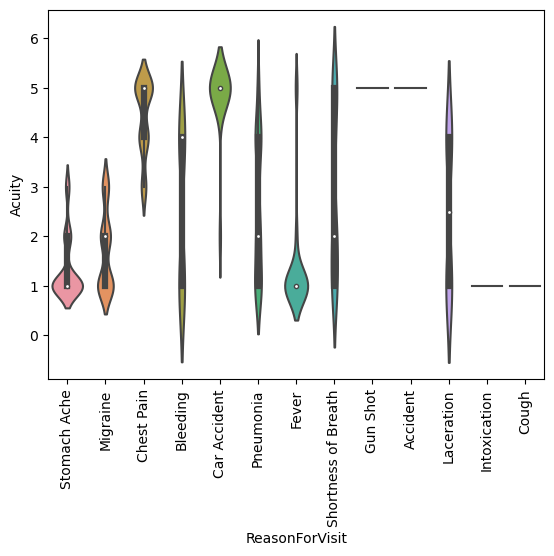

In [75]:
import seaborn as sns
sns.violinplot(x = 'ReasonForVisit', y = 'Acuity', data = edvisits)
plt.xticks(rotation='vertical')
plt.show()


# Q 71 Find the count of White Spanish Male.

In [73]:
patients[(patients['Gender']=='Male')&(patients['Race']=='White')&(patients['Language']=='Spanish')].agg({'PatientID' : ['count']})

,PatientID
count,15


# Q 72 Which PrimaryDiagnosis has the biggest difference between maximum and minimum Expected LOS?

In [19]:
exp=readmissionregistry.groupby('PrimaryDiagnosis').agg({'ExpectedLOS': np.ptp})
exp[exp['ExpectedLOS']==exp['ExpectedLOS'].max()]

,ExpectedLOS
PrimaryDiagnosis,
Pneumonia,14.83426


# Q 73 Which patient id has most entries in readmission registry.

In [20]:
readmissionregistry['PatientID'].value_counts().idxmax()



23

# Q 74 "Create a figure object called fig using plt.figure() ** ** Use add_axes to add an axis to the figure canvas at [0,0,1,1]. Call this new axis ax. **** Plot (x,y) on that axes and set the labels.Note : You can plot on any x,y set of values."

Text(0.5, 1.0, 'title')

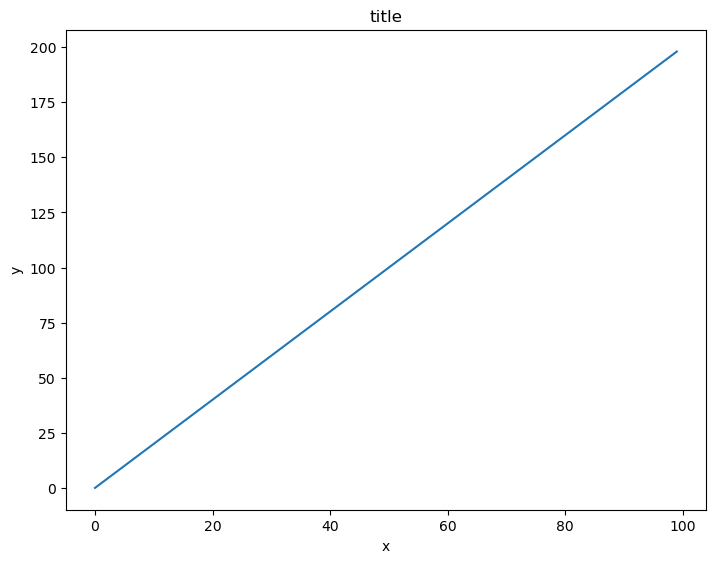

In [59]:
x = np.arange(0,100)
y = x*2
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(x,y)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('title')

# Q 75 "Using numpy functions, multiply the following arrays a=np.arange(6).reshape(2,3) b=np.arange(6).reshape(3,2)

In [21]:
a=np.arange(6).reshape(2,3)
b=np.arange(6).reshape(3,2)
c=np.dot(a,b)
c

array([[10, 13],
       [28, 40]])

# Q 76 Mortality O:E

In [22]:
discharges_sum=discharges['ExpectedMortality'].sum()
discharges_exp=discharges.query("DischargeDisposition == 'Expired'")
discharges_total_exp= discharges_exp.count()[0]
mortal_oe=discharges_total_exp/discharges_sum
mortal_oe

0.4272709474250124

# Q 77 Plot a graph to count the patients based on discharge disposition.

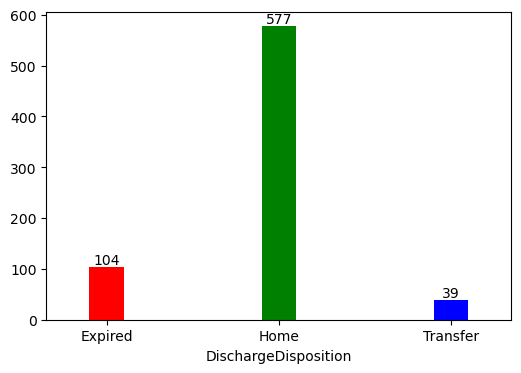

In [23]:
import matplotlib.pyplot as plt
dis=discharges.groupby('DischargeDisposition')['PatientID'].count()
ax = dis.plot.bar(figsize=(6,4), width=0.2,color=['r', 'g', 'b'])
ax.bar_label(ax.containers[0], label_type='edge')
plt.xticks(rotation=0)
plt.show()

# Q 78 Display total count of patients service wise based on gender.

In [24]:
pat_re=pd.merge(patients,readmissionregistry,how='inner',on='PatientID')
pat_re.groupby(['Gender','Service']).agg(count_Of_Patients=('PatientID','count'))


count_Of_Patients
Gender Service                            
Female Cardiology                       41
       General Medicine                114
       Hospitalist                      35
       ICU                              65
       Neurology                        34
       Orthopeadics                     22
Male   Cardiology                       54
       General Medicine                149
       Hospitalist                      66
       ICU                              86
       Neurology                        31
       Orthopeadics                     23

# Q 79 Create a pivot table displaying average LOS based on Service and Primary Diagnosis.

In [25]:
readmissionregistry['Los']=(readmissionregistry['DischargeDate']-readmissionregistry['AdmissionDate']).dt.days
pd.pivot_table(readmissionregistry,index=['Service','PrimaryDiagnosis'],values='Los',aggfunc='mean')

Los
Service          PrimaryDiagnosis             
Cardiology       AMI                 10.250000
                 Afib                11.200000
                 Broken Leg          10.666667
                 Flu                 12.000000
                 Heart Failure        9.512821
                 Kidney Failure       4.000000
General Medicine Broken Leg          13.000000
                 Diabetes            10.289474
                 Fever                8.000000
                 Flu                  9.888889
                 Hypertension         8.914286
                 Kidney Failure      10.666667
                 Laceration           9.428571
                 Pneumonia            9.417910
                 Stroke              11.250000
Hospitalist      AMI                 10.000000
                 Broken Leg           7.666667
                 Diabetes             8.846154
                 Fever               10.666667
                 Flu                  8.736842
                 Hypertension        10.666667
                 Kidney Failure      10.166667
                 Knee Replacement     6.000000
                 Laceration           9.000000
                 Pneumonia            8.928571
                 Stroke              16.000000
ICU              AMI                 12.200000
                 Afib                 6.000000
                 Fever               13.333333
                 Flu                  8.000000
                 Heart Failure        9.454545
                 Hypertension         8.500000
                 Kidney Failure      11.000000
                 Laceration          15.000000
                 Pneumonia            8.298701
                 Spinal Cord Injury  10.000000
                 Stroke              10.333333
Neurology        AMI                  9.000000
                 Flu                  7.000000
                 Heart Failure       13.166667
                 Hypertension         9.000000
                 Migraine             8.583333
                 Pain                10.285714
                 Pneumonia            9.800000
                 Stroke               9.615385
Orthopeadics     Hip Fracture         9.173913
                 Knee Replacement     9.500000

# Q 80 Display the data for all 'White Female' patients above the age of 50.

In [26]:
white_female=patients[(patients['Race']=='White')&
                            (patients['Gender']=='Female')&(patients['age']>50)]
white_female


,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,age
28,29,Ted,Scott,1967-12-09 05:01:37.892,Female,White,Spanish,55.0
30,31,Harry,Ding,1960-10-08 01:42:51.212,Female,White,Spanish,62.0
33,34,Ted,Hue,1960-11-28 18:05:11.459,Female,White,Spanish,62.0
34,35,Fred,Tye,1966-04-14 06:01:07.169,Female,White,Spanish,57.0
39,40,Christian,Pow,1971-12-07 11:47:43.885,Female,White,Spanish,51.0
...,...,...,...,...,...,...,...,...
865,866,Jermayne,Lowndes,1970-12-09 04:49:48.933,Female,White,English,52.0
866,867,Gail,Inc,1967-03-10 08:18:47.908,Female,White,English,56.0
867,868,Des,Heindrick,1969-08-15 11:05:30.165,Female,White,English,53.0
869,870,Hauck,Rubbens,1963-11-16 03:31:38.929,Female,White,English,59.0
